# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Thobias Zandisko Panjaitan]
- **Email:** [thoxir058@gmail.com]
- **ID Dicoding:** [thobiazp]

## Menentukan Pertanyaan Bisnis

- Bagaimana kondisi cuaca dan waktu yang paling menarik bagi pengguna untuk menyewa sepeda berdasarkan akumulasi total pencatatan sewa pengguna keseluruhan?
- Bagaimana performa penggunaan sepeda rental dari tahun 2011 ke 2012 berdasarkan rata-rata pencatatan sewa per kuarter?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker



## Data Wrangling

### Gathering Data

In [ ]:
# Menerjemahkan CSV ke DF
day_df = pd.read_csv('data/day.csv')


# MEMBACA DF
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
# Menerjemahkan CSV ke DF
hour_df = pd.read_csv('data/hour.csv')

# MEMBACA DF
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- kedua dataset yaitu hour_df dan day_df memiliki fitur yang menunjukkan tanggal, kondisi waktu, kondisi cuaca (i.e suhu, kecepatan angin, dl), serta data akumulasi pelanggan.
- kedua dataset memiliki fitur yang sama, kecuali fitur hr (jam) yang hanya dimiliki dataset hour_df.

### Assessing Data

In [6]:
"""
Melakukan pengecekan kedua data frame untuk dibersihkan jika terdapat kriteria data sbb :
-Duplikasi data
-Data yang kosong
-Tipe data yang kurang tepat
-Data yang inakurat
-Data yang Aneh, dll.

"""
# Melakukan pengecekan tipe data, nilai kolom, dll dengan menggunakan function info()
day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
# Melakukan pengecekan tipe data, nilai kolom, dll dengan menggunakan function info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
#Mendeteksi nilai kosong pada day_df
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
# Mendeteksi nilai kosong pada hour_df
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [14]:
# Mendeteksi nilai duplikat pada day_df dan hour_df
print("Jumlah duplikat pada day_df: ", day_df.duplicated().sum())
print("Jumlah duplikat pada hour_df: ", hour_df.duplicated().sum())

Jumlah duplikat pada day_df:  0
Jumlah duplikat pada hour_df:  0


In [15]:
# Menelusuri deskripsi statistikal day_df untuk menemukan data yang aneh jika ada.
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [16]:
# Menelusuri deskripsi statistikal hour_df untuk menemukan data yang aneh jika ada.
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ada nilai yang aneh dan inakurat. Namun, terdapat total jumlah data hour yang kurang
sinkron dengan total jumlah day
Total data day_df : 731 = 731 Hari sedangkan
Total data hour_df : 17379 jam = 724 Hari
- Hanya terdapat total data yang tidak sinkron antara dua df yang akan di cek di tahap cleaning data
- Tidak terdapat indikasi missing values, duplicated values, inaccurate values, dll
- Terdapat fitur tanggal yang bertipe object, akan dikonversi ke datetime

### Cleaning Data

In [17]:
# Mengubah tipe data dteday dari object menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [18]:
# Mengubah tipe data dteday dari object menjadi datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [19]:
# Mengetahui kenapa ada total value yang tidak sinkron pada kedua data
day_hour_df = pd.merge(
        left = day_df,
        right = hour_df,
        how = 'outer',
        left_on = 'dteday',
        right_on = 'dteday'

)

day_hour_df.head()


,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [20]:
# Mengecek nilai kosong pada dataframe day_hour_df yang baru kita buat
day_hour_df.isna().sum()

instant_x       0
dteday          0
season_x        0
yr_x            0
mnth_x          0
holiday_x       0
weekday_x       0
workingday_x    0
weathersit_x    0
temp_x          0
atemp_x         0
hum_x           0
windspeed_x     0
casual_x        0
registered_x    0
cnt_x           0
instant_y       0
season_y        0
yr_y            0
mnth_y          0
hr              0
holiday_y       0
weekday_y       0
workingday_y    0
weathersit_y    0
temp_y          0
atemp_y         0
hum_y           0
windspeed_y     0
casual_y        0
registered_y    0
cnt_y           0
dtype: int64

In [21]:
# Mengecek total jumlah nilai pada setiap nilai pada kolom hr untuk menjawab pertanyaan kita sebelumnya mengenai ketidakseimbangan data
day_hour_df.hr.value_counts().sort_index().head()

hr
0    726
1    724
2    715
3    697
4    697
Name: count, dtype: int64

**Insight:**
- Total data tidak sinkron hanya dikarenakan terdapat titik jam yang tidak dimonitor
- Pada data hour_df seharusnya terdapat 731 x 24  total data atau 17544 total data
agar sinkon dengan total data pada day_df yaitu 731 data atau 731 hari.
Namun, ternyata hal ini dapat dijelaskan dari kode diatas yang baru kita lakukan dimana
pemonitoran yang dilakukan seharusnya setiap jam setiap harinya, ternyata terdapat
dimana hari-hari tertentu pemonitoran di jam tertentu itu tidak lakukan, atau tidak ter-record.
Bukan sebuah missing values.


## Exploratory Data Analysis (EDA)

### Explore ...

In [22]:
"""
Terdapat banyak data kategorikal yang direpresentasikan sebagai integer,
dimana maknanya sudah dijelaskan pada README.md yang disediakan di file zip
asal data tersebut. Untuk itu mari kita mempermudahkan pengolahan data dengan
mengubah tipe data integer ini ke object sesuai dengan maknanya
agar memudahkan pengolahan data.
"""


# Konversi setiap data kategorikal yang memiliki tipe data integer ke tipe data object pada hour_df
hour_df['workingday'] = hour_df.workingday.apply(lambda x:'non-working days' if x == 1 else 'workdays')
hour_df['yr'] = hour_df.yr.apply(lambda x: 2011 if x == 0 else 2012)
hour_df['season'] = hour_df.season.apply(lambda x:'springer' if x == 1 else ('summer' if x==2 else('fall' if x==3 else 'winter')))
hour_df['time_cycle'] = hour_df.hr.apply(
    lambda x: 'morning' if (x >= 4) & (x <= 11) else
              ('midday/noon' if (x >= 12) & (x <= 15) else
               ('afternoon' if (x >= 16) & (x <= 18) else 'night'))
)

hour_df.sample(20)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_cycle
15603,15604,2012-10-17,winter,2012,10,8,0,3,non-working days,2,0.40,0.4091,0.76,0.0000,38,779,817,morning
2666,2667,2011-04-26,summer,2011,4,0,0,2,non-working days,1,0.62,0.6061,0.69,0.2836,10,17,27,night
9928,9929,2012-02-23,springer,2012,2,17,0,4,non-working days,1,0.54,0.5152,0.32,0.1642,49,561,610,afternoon
14814,14815,2012-09-14,fall,2012,9,11,0,5,non-working days,2,0.68,0.6364,0.61,0.1045,84,196,280,morning
4147,4148,2011-06-26,fall,2011,6,17,0,0,workdays,2,0.72,0.6515,0.42,0.1642,178,243,421,afternoon
14200,14201,2012-08-19,fall,2012,8,21,0,0,workdays,3,0.62,0.5909,0.78,0.0896,36,154,190,night
10474,10475,2012-03-17,springer,2012,3,13,0,6,workdays,1,0.60,0.6061,0.60,0.1045,286,400,686,midday/noon
12509,12510,2012-06-10,summer,2012,6,10,0,0,workdays,1,0.76,0.6818,0.40,0.1045,148,265,413,morning
763,764,2011-02-04,springer,2011,2,6,0,5,non-working days,2,0.16,0.2273,0.55,0.0000,2,26,28,morning
10435,10436,2012-03-15,springer,2012,3,22,0,4,non-working days,1,0.52,0.5000,0.68,0.1343,32,137,169,night


In [23]:
# Konversi setiap data kategorikal yang memiliki tipe data integer ke tipe data object pada day_df
day_df['workingday'] = day_df.workingday.apply(lambda x:'non-working days' if x == 1 else 'workdays')
day_df['yr'] = day_df.yr.apply(lambda x: 2011 if x == 0 else 2012)
day_df['season'] = day_df.season.apply(lambda x:'springer' if x == 1 else ('summer' if x==2 else('fall' if x==3 else 'winter')))


day_df.sample(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
339,340,2011-12-06,winter,2011,12,0,2,non-working days,3,0.462500,0.456400,0.949583,0.232583,126,2468,2594
395,396,2012-01-31,springer,2012,1,0,2,non-working days,1,0.390000,0.381317,0.416667,0.261817,324,4185,4509
229,230,2011-08-18,fall,2011,8,0,4,non-working days,1,0.711667,0.662258,0.654583,0.233208,639,3166,3805
455,456,2012-03-31,summer,2012,3,0,6,workdays,2,0.424167,0.421708,0.738333,0.250617,2301,3934,6235
491,492,2012-05-06,summer,2012,5,0,0,workdays,2,0.562500,0.546737,0.740000,0.149879,2135,4224,6359
618,619,2012-09-10,fall,2012,9,0,1,non-working days,1,0.583333,0.565654,0.503750,0.258713,1118,6407,7525
513,514,2012-05-28,summer,2012,5,1,1,workdays,1,0.712500,0.679300,0.676250,0.196521,2557,3486,6043
407,408,2012-02-12,springer,2012,2,0,0,workdays,1,0.127500,0.101658,0.464583,0.409212,73,1456,1529
183,184,2011-07-03,fall,2011,7,0,0,workdays,2,0.716667,0.668575,0.682500,0.228858,2282,2367,4649
160,161,2011-06-10,summer,2011,6,0,5,non-working days,1,0.755000,0.703292,0.605000,0.140554,815,3771,4586


In [24]:
# Mengetahui data pada time_cycle yang baru dibuat
time_cycle_df = hour_df.groupby(by='time_cycle').instant.nunique().sort_values(ascending=False)
time_cycle_df.head()

time_cycle
night          6502
morning        5774
midday/noon    2915
afternoon      2188
Name: instant, dtype: int64

In [25]:
# Mengetahui data user casual,registered, dan keseluruhan pada beberapa parameter (mnth)
some_df = day_df.groupby(by='mnth').agg({
    'casual':['mean','min','max'],
    'registered':['mean','min','max'],
    'cnt':['mean','min','max']
})
some_df.head()

casual              registered                      cnt            
             mean  min   max         mean   min   max         mean   min   max
mnth                                                                          
1      194.225806    9  1070  1982.112903   416  4185  2176.338710   431  4521
2      262.508772   47  1435  2392.789474   905  4546  2655.298246  1005  5062
3      716.838710   46  3155  2975.419355   491  5893  3692.258065   605  8362
4     1013.366667  120  3252  3471.533333   674  5950  4484.900000   795  7460
5     1214.274194  255  3410  4135.500000  2213  6433  5349.774194  2633  8294

In [26]:
# Mengetahui data user casual,registered, dan keseluruhan pada beberapa parameter (season)
some_df2 = day_df.groupby(by='season').agg({
    'casual':['mean','min','max'],
    'registered':['mean','min','max'],
    'cnt':['mean','min','max']
})
some_df2.head()

casual              registered                     cnt        \
                 mean  min   max         mean  min   max         mean   min   
season                                                                        
fall      1202.611702  118  3160  4441.691489  889  6917  5644.303191  1115   
springer   334.928177    9  3155  2269.204420  416  5315  2604.132597   431   
summer    1106.097826  120  3410  3886.233696  674  6456  4992.331522   795   
winter     729.112360    2  3031  3999.050562   20  6946  4728.162921    22   

                
           max  
season          
fall      8714  
springer  7836  
summer    8362  
winter    8555

In [28]:
# Melakukan pivot untuk mengetahui akumulasi user berdasarkan gabungan data season, time cycle, working day
all_time_df = hour_df.groupby(by=['season','time_cycle','workingday']).agg({
		'casual' : ['max','mean'],
		'registered' : ['max','mean'],
		'cnt' : ['max','mean','sum']
}).sort_values(ascending=False, by=('cnt','sum'))

all_time_df.columns = ['_'.join(col) for col in all_time_df.columns]
all_time_df = all_time_df.sort_values(by='cnt_sum', ascending=False)
all_time_df.head(20)


casual_max  casual_mean  \
season   time_cycle  workingday                                  
fall     morning     non-working days         108    24.791031   
         afternoon   non-working days         168    75.631043   
         night       non-working days         128    27.094388   
summer   morning     non-working days         131    20.345098   
winter   morning     non-working days         121    13.782563   
summer   afternoon   non-working days         264    66.924479   
winter   afternoon   non-working days         158    41.966667   
summer   night       non-working days         213    20.413913   
winter   night       non-working days          81    10.171482   
fall     midday/noon non-working days         178    59.501908   
springer morning     non-working days          77     7.117264   
summer   midday/noon non-working days         240    54.496094   
winter   midday/noon non-working days         240    40.386221   
fall     midday/noon workdays                 327   167.710526   
summer   midday/noon workdays                 361   180.843750   
winter   midday/noon workdays                 362   134.885965   
springer afternoon   non-working days         140    19.805014   
fall     night       workdays                 237    46.271825   
springer night       non-working days          86     5.117534   
fall     morning     workdays                 228    46.935982   

                                       registered_max  registered_mean  \
season   time_cycle  workingday                                          
fall     morning     non-working days             780       189.833969   
         afternoon   non-working days             886       467.865140   
         night       non-working days             598       134.247449   
summer   morning     non-working days             696       164.621569   
winter   morning     non-working days             808       182.367647   
summer   afternoon   non-working days             782       407.763021   
winter   afternoon   non-working days             876       417.005556   
summer   night       non-working days             554       111.272174   
winter   night       non-working days             662       105.730662   
fall     midday/noon non-working days             502       171.059160   
springer morning     non-working days             628       114.003257   
summer   midday/noon non-working days             360       156.886719   
winter   midday/noon non-working days             381       174.083507   
fall     midday/noon workdays                     510       264.662281   
summer   midday/noon workdays                     421       244.741071   
winter   midday/noon workdays                     526       270.903509   
springer afternoon   non-working days             681       237.612813   
fall     night       workdays                     362       113.051587   
springer night       non-working days             480        63.442197   
fall     morning     workdays                     437       101.766004   

                                       cnt_max    cnt_mean  cnt_sum  
season   time_cycle  workingday                                      
fall     morning     non-working days      808  214.625000   224927  
         afternoon   non-working days      977  543.496183   213594  
         night       non-working days      698  161.341837   189738  
summer   morning     non-working days      745  184.966667   188666  
winter   morning     non-working days      839  196.150210   186735  
summer   afternoon   non-working days      957  474.687500   182280  
winter   afternoon   non-working days      967  458.972222   165230  
summer   night       non-working days      686  131.686087   151439  
winter   night       non-working days      743  115.902144   124363  
fall     midday/noon non-working days      651  230.561069   120814  
springer morning     non-working days      662  121.120521   111552  
summer   midday/noon non-working days      537 

In [29]:
# Melakukan pivot untuk mengetahui akumulasi user berdasarkan data season
season_time_df = hour_df.groupby(by=['season']).agg({
		 'casual' : ['max','mean'],
		 'registered' : ['max','mean'],
		 'cnt' : ['max','mean','sum']
}).sort_values(ascending=False, by=('cnt','sum'))

season_time_df.columns = ['_'.join(col) for col in season_time_df.columns]
season_time_df = season_time_df.sort_values(by='cnt_sum', ascending=False)
season_time_df.head()

,casual_max,casual_mean,registered_max,registered_mean,cnt_max,cnt_mean,cnt_sum
season,,,,,,,
fall,350,50.287144,886,185.729093,977,236.016237,1061129
summer,361,46.160581,782,162.183488,957,208.344069,918589
winter,362,30.666824,876,168.202032,967,198.868856,841613
springer,367,14.290901,681,96.823668,801,111.114569,471348


In [30]:
# Melakukan pivot untuk mengetahui akumulasi user berdasarkan data time cycle
timecyc_time_df = hour_df.groupby(by=['time_cycle']).agg({
		 'casual' : ['max','mean'],
		 'registered' : ['max','mean'],
		 'cnt' : ['max','mean','sum']
}).sort_values(ascending=False, by=('cnt','sum'))

timecyc_time_df.columns = ['_'.join(col) for col in timecyc_time_df.columns]
timecyc_time_df = timecyc_time_df.sort_values(by='cnt_sum', ascending=False)
timecyc_time_df.head()

,casual_max,casual_mean,registered_max,registered_mean,cnt_max,cnt_mean,cnt_sum
time_cycle,,,,,,,
morning,268,22.208867,808,138.166609,839,160.375476,926008
afternoon,367,69.721207,886,329.904022,977,399.625229,874380
night,237,19.548908,662,97.977545,743,117.526453,764157
midday/noon,362,72.770497,526,177.018182,776,249.788679,728134


In [31]:
# Melakukan pivot untuk mengetahui akumulasi user berdasarkan data working day
wd_time_df = hour_df.groupby(by=['workingday']).agg({
		 'casual' : ['max','mean'],
		 'registered' : ['max','mean'],
		 'cnt' : ['max','mean','sum']
}).sort_values(ascending=False, by=('cnt','sum'))

wd_time_df.columns = ['_'.join(col) for col in wd_time_df.columns]
wd_time_df = wd_time_df.sort_values(by='cnt_sum', ascending=False)
wd_time_df.head()

,casual_max,casual_mean,registered_max,registered_mean,cnt_max,cnt_mean,cnt_sum
workingday,,,,,,,
non-working days,264,25.561315,886,167.646439,977,193.207754,2292410
workdays,367,57.441422,601,123.963910,783,181.405332,1000269


In [33]:
day_df['quarter'] = day_df['dteday'].dt.quarter.map({1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'})


# Melakukan pivot untuk mengetahui akumulasi user berdasarkan year, dan quarter
year_qrt_df = day_df.groupby(by=['yr','quarter']).agg({
		 'casual' : ['max','mean'],
		 'registered' : ['max','mean'],
		 'cnt' : ['max','mean','sum']
}).sort_values(ascending=False, by=('cnt','mean'))


year_qrt_df.columns = ['_'.join(col) for col in year_qrt_df.columns]
year_qrt_df = year_qrt_df.sort_index(level=['yr', 'quarter'], ascending=[True, True])

year_qrt_df.head(10)

casual_max  casual_mean  registered_max  registered_mean  \
yr   quarter                                                             
2011 Q1             1424   246.011111            2355      1425.644444   
     Q2             2355   923.164835            4488      3188.956044   
     Q3             3065   998.250000            4614      3408.815217   
     Q4             2397   535.478261            4267      2866.706522   
2012 Q1             3155   541.846154            5893      3466.461538   
     Q2             3410  1384.450549            6456      4911.362637   
     Q3             3160  1398.695652            6946      5521.771739   
     Q4             3031   747.739130            6911      4417.673913   

              cnt_max     cnt_mean  cnt_sum  
yr   quarter                                 
2011 Q1          3239  1671.655556   150449  
     Q2          5805  4112.120879   374203  
     Q3          6043  4407.065217   405450  
     Q4          5511  3402.184783   313001  
2012 Q1          8362  4008.307692   364756  
     Q2          8294  6295.813187   572919  
     Q3          8714  6920.467391   636683  
     Q4          8156  5165.413043   475218

**Insight:**
- Terdapat potensi visualisasi pengelompokkan waktu berdasarkan musim, siklus waktu, dan hari kerja atau tidak, yang sudah kita kelompokkan lalu sudah kita operasikan agar kita mengetahui yang mana yang terdapat total penggunaan sepeda rental terbanyak. Jika pada musim maka kita mendapatkan fall. Jika pada time cycle maka kita mendapatkan morning, dan pada tipe hari kita mendapat non-working days
-Terdapat gejolak performa penggunaan sepeda rental pada setiap quarter per tahun  yang dapat lebih mudah dijelaskan pada bagian visualisasi

## Visualization & Explanatory Analysis

### Pertanyaan 1:

C:\Users\User\AppData\Local\Temp\ipykernel_2424\2205679556.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
C:\Users\User\AppData\Local\Temp\ipykernel_2424\2205679556.py:18: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  ax = sns.barplot(


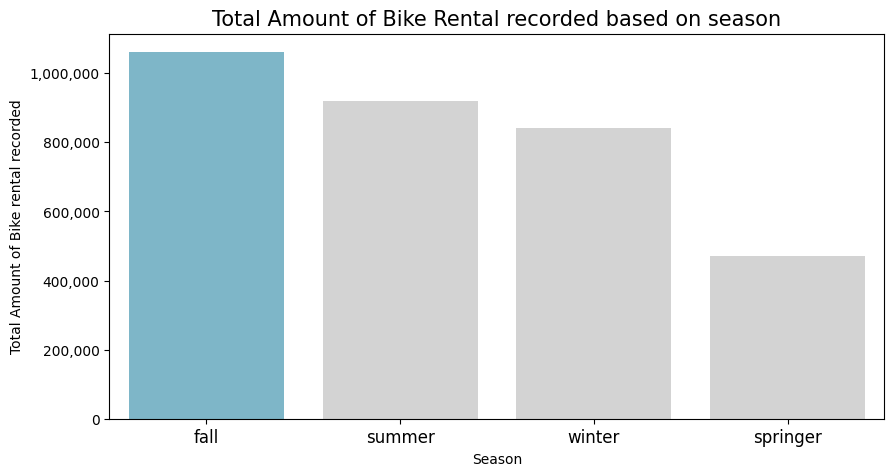

C:\Users\User\AppData\Local\Temp\ipykernel_2424\2205679556.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\User\AppData\Local\Temp\ipykernel_2424\2205679556.py:34: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


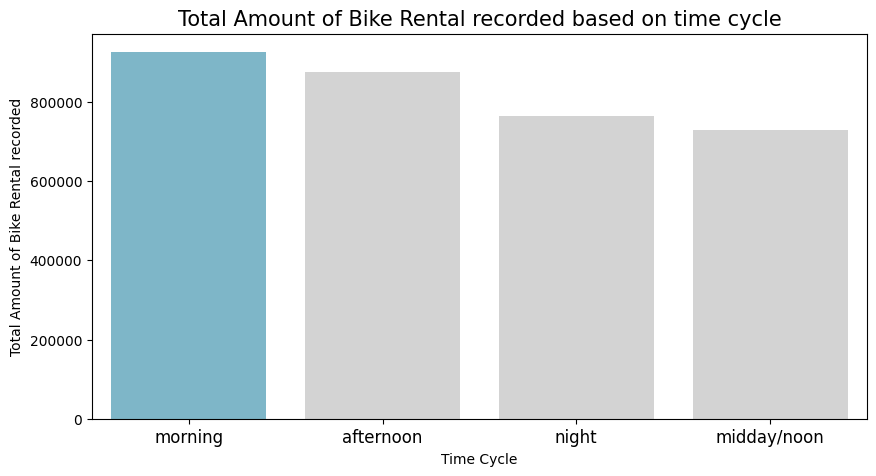

C:\Users\User\AppData\Local\Temp\ipykernel_2424\2205679556.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(
C:\Users\User\AppData\Local\Temp\ipykernel_2424\2205679556.py:49: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  ax2 = sns.barplot(


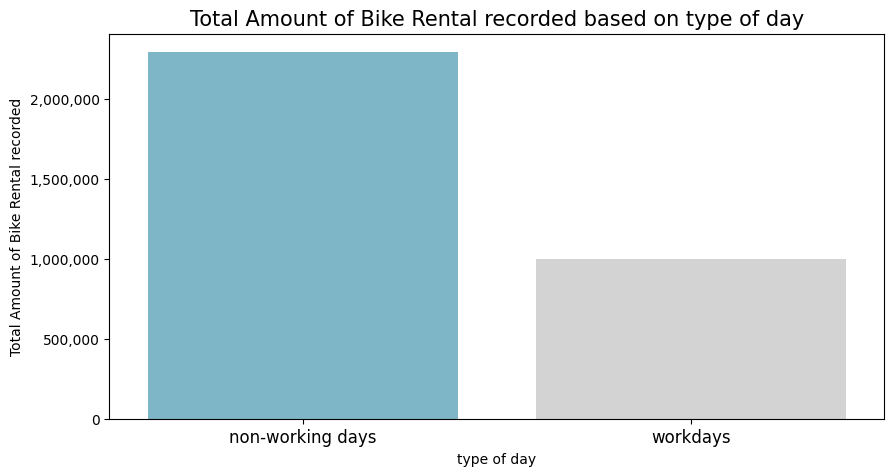

In [37]:
# Visualisasi data mencari tahu total jumlah sepeda yang berhasil dirental berdasarkan musim
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

season_time_df.rename(columns={
    "cnt_sum": "total_customer"
}, inplace=True)
timecyc_time_df.rename(columns={
    "cnt_sum": "total_customer"
}, inplace=True)
wd_time_df.rename(columns={
    "cnt_sum": "total_customer"
}, inplace=True)



plt.figure(figsize=(10, 5))

ax = sns.barplot(
  y="total_customer",
  x="season",
  data=season_time_df.sort_values(by="total_customer", ascending=False),
  palette=colors
)
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.title("Total Amount of Bike Rental recorded based on season", loc="center", fontsize=15)
plt.ylabel("Total Amount of Bike rental recorded")
plt.xlabel("Season")
plt.tick_params(axis='x', labelsize=12)
plt.show()

# Visualisasi data mencari tahu total jumlah sepeda yang berhasil dirental berdasarkan siklus waktu
plt.figure(figsize=(10, 5))

sns.barplot(
  y="total_customer",
  x="time_cycle",
  data=timecyc_time_df.sort_values(by="total_customer", ascending=False),
  palette=colors
)
plt.title("Total Amount of Bike Rental recorded based on time cycle", loc="center", fontsize=15)
plt.ylabel("Total Amount of Bike Rental recorded")
plt.xlabel("Time Cycle")
plt.tick_params(axis='x', labelsize=12)
plt.show()

# Visualisasi data mencari tahu total jumlah sepeda yang berhasil dirental berdasarkan tipe hari
plt.figure(figsize=(10, 5))

ax2 = sns.barplot(
  y="total_customer",
  x="workingday",
  data=wd_time_df.sort_values(by="total_customer", ascending=False),
  palette=colors
)
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.title("Total Amount of Bike Rental recorded based on type of day", loc="center", fontsize=15)
plt.ylabel("Total Amount of Bike Rental recorded")
plt.xlabel("type of day")
plt.tick_params(axis='x', labelsize=12)
plt.show()




### Pertanyaan 2:

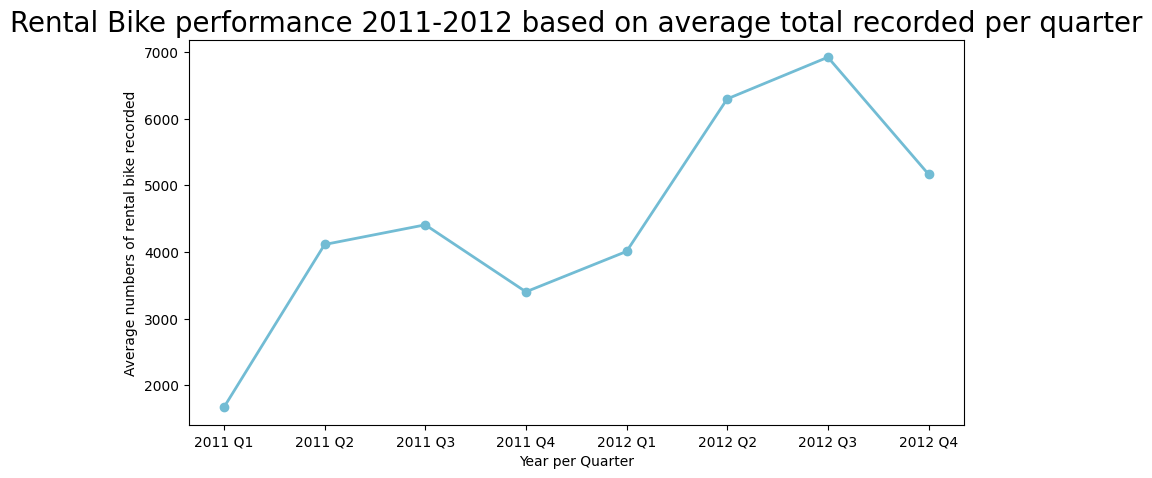

In [36]:
# Visualisasi data mencari tren penggunaan sepeda rental antara 2011 - 2012 berdarkan rata-rata pada tiap tahun per quartal
year_qrt_df['yearnquarter'] = year_qrt_df.index.get_level_values('yr').astype(str) + ' ' + year_qrt_df.index.get_level_values('quarter')
year_qrt_df.reset_index()
year_qrt_df.head(10)

plt.figure(figsize=(10, 5))
plt.plot(year_qrt_df["yearnquarter"], year_qrt_df["cnt_mean"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Rental Bike performance 2011-2012 based on average total recorded per quarter", loc="center", fontsize=20)
plt.ylabel("Average numbers of rental bike recorded")
plt.xlabel("Year per Quarter")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

year_qrt = year_qrt_df.reset_index()
all_time = all_time_df.reset_index()
year_qrt.to_csv("time_qtr.csv", index=False)
season_time_df.to_csv("season_time.csv")
timecyc_time_df.to_csv("timecyc_time.csv")
wd_time_df.to_csv("wd_time.csv")
all_time.to_csv("all_time.csv", index=False)

**Insight:**
- Berdasarkan kondisi musim, siklus waktu, dan tipe hari, akumulasi total sewa yang paling banyak secara urutan kondisi tadi adalah musim gugur, siklus waktu pagi, dan tipe hari non-working.
- Tahun 2012 penggunaan sepeda rental mengalami kenaikkan yang cukup signifikan, dengan peak 2012 hampir menyentuh 2 kali lipat peak pada 2011.

## Analisis Lanjutan (Opsional)

## Conclusion

- Dari keseluruhan analisis data yang sudah saya lakukan, Kondisi musim yang memiliki pencatatan sewa terbanyak berdasarkan total keseluruhan sewa dari pelanggan casual dan terdaftar per musim adalah musim gugur/fall, dimana angka menunjukkan lebih dari 1.000.000 penyewaan tercatat pada musim tersebut dari 2011-2012.
- Kemudian jika didasarkan dengan siklus waktu/time cycle total keseluruhan pencatatan sewa dari pelanggan casual dan terdaftar adalah siklus waktu pagi, dimana angka menunjukkan lebih dari 800.000 penyewaan tercatat pada siklus waktu tersebut dari 2011-2012
- Kemudian jika didasarkan oleh tipe hari, tipe hari weekend/ atau non-working days memenangkan perolehan total pencatatan penyewaan dengan angka lebih dari 2.200.000 dibandingkan dengan weekdays/ working days
- Dari keseluruhan analisis, berdasarkan rata-rata penyewaan tercatat pada per kuarter, performa penyewaan sepeda mengalami kenaikan yang sangat signifikan dari 2011 sampai 2012. Dimana titik tertinggi pada tahun 2011 terjadi di kuarter ke-3 yaitu lebih  dari 4400 rata-rata penyewaan tercatat. Namun, hebatnya pada 2012 terdapat 3 kuarter yang melampaui titik tertinggi 2011, yaitu kuarter-2, kuarter-3, dan kuarter-4, dimana yang tertinggi di raih oleh kuarter-3 pada angka hampir mencapai 7000 pencatatan penyewaan.